In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from plotnine import *

### Data reading and preprocessing

#### Trivial data

In [ ]:
dane = pd.DataFrame({'x' : [2, 1, 0, -1, -2, -1,  0,  1],
                     'y' : [0, 1, 2,  1,  0, -1, -2, -1],
                     'c' : [0, 1, 2,  3,  4,  5,  6,  7]})
#dane #curve of dimensionality

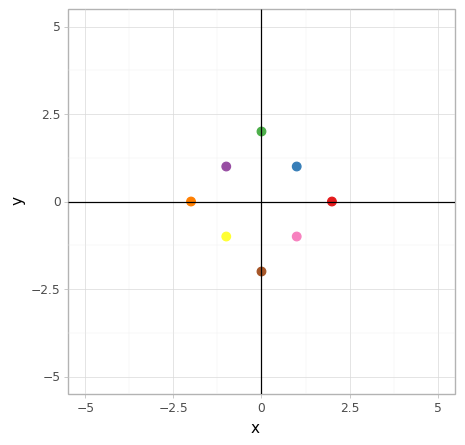

<ggplot: (8752623069169)>

In [ ]:
(ggplot(dane, aes('x','y', color = 'factor(c)')) +
 geom_point(size = 3, show_legend = False) +
 geom_hline(yintercept = 0) +
 geom_vline(xintercept = 0) +
 scale_color_brewer(type="qual", palette="Set1") +
 theme_light() + 
 theme(figure_size=(5, 5)) +
 xlim(-5,5) +
 ylim(-5,5) 
)

In [ ]:
#A = np.array([[2,0],[0,1]])
# A = np.array([[1,0],[0,-0.5]])
#A = np.array([[0,2],[1,0]])
A = np.array([[3,0],[4,5]])

In [ ]:
dane[['x_A', 'y_A']] = np.matmul(dane.iloc[:,:2], A)

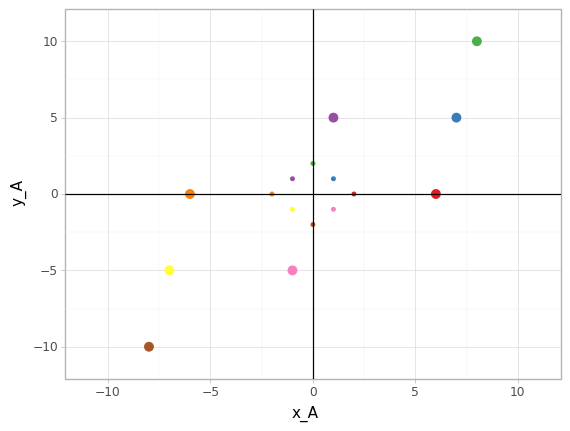

<ggplot: (8752620305341)>

In [ ]:
(ggplot(dane, aes('x_A','y_A', color = 'factor(c)')) +
 geom_point(size = 3, show_legend = False) +
 geom_point(aes('x','y', color = 'factor(c)'), size = 1, show_legend = False) +
 geom_hline(yintercept = 0) +
 geom_vline(xintercept = 0) +
 scale_color_brewer(type="qual", palette="Set1") +
 theme(figure_size=(5, 5)) +
 theme_light() +
 xlim(-11,11) +
 ylim(-11,11) 
)

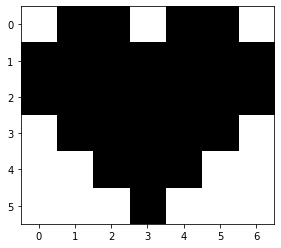

In [ ]:
serce = np.array([[0,1,1,0,1,1,0],
              [1,1,1,1,1,1,1],
              [1,1,1,1,1,1,1],
              [0,1,1,1,1,1,0],
              [0,0,1,1,1,0,0],
              [0,0,0,1,0,0,0],
             ])
plt.imshow(1-serce, cmap='gray')
plt.show()

#### Real data

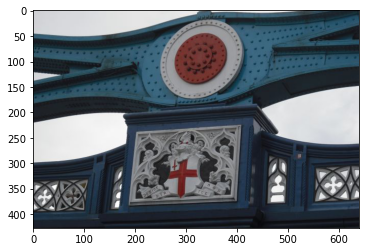

In [ ]:
most = plt.imread('most.jpg', format='jpeg')
plt.imshow(most)
plt.show()

#### Work on a black and white photo

In [ ]:

most_flat = most.reshape(-1, 3)
most_sr = most_flat.mean(axis=1)
most_sr = most_sr.reshape(most.shape[:-1])

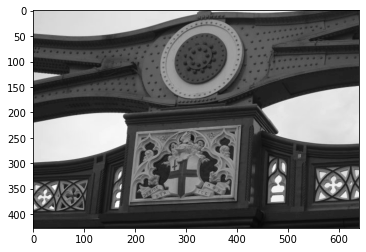

In [ ]:
plt.imshow(most_sr, cmap='gray')
plt.show()

In [ ]:
rozmiar = np.prod(most_sr.shape)
print(f'Rozmiar danych to {rozmiar}')

Rozmiar danych to 273280


### **SVD** - *Singular Value Decomposition*

każdą macierz rzeczywistą $A$ można przedstawić w postaci dekompozycji na iloczyn trzech specyficznych macierzy:

$$ A=U\Sigma V^{T},$$


gdzie:

$U$ i $V$ – macierze ortogonalne (czyli $U^{-1}=U^{T}$ $V^{-1}=V^T)$,

$\Sigma$  – macierz diagonalna, taka że $\Sigma={diag}(\sigma _{i})$ gdzie $\sigma_{i}$ – nieujemne wartości szczególne (osobliwe) macierzy $A$, zwyczajowo uporządkowane nierosnąco.

In [ ]:
from numpy.linalg import svd

#### Trivial example

In [ ]:
U,S,V = svd(A)
sigma = np.diag(S)

In [ ]:
V

array([[-0.70710678, -0.70710678],
       [-0.70710678,  0.70710678]])

In [ ]:
print(f'Macierz U ma wymiary {U.shape}')
print(f'Macierz sigma ma wymiary {S.shape}')
print(f'Macierz V ma wymiary {V.shape}')

Macierz U ma wymiary (2, 2)
Macierz sigma ma wymiary (2,)
Macierz V ma wymiary (2, 2)


In [ ]:
print(np.matmul(U, U.T).round(2))
print(np.matmul(V.T, V).round(2))

[[1. 0.]
 [0. 1.]]
[[ 1. -0.]
 [-0.  1.]]


In [ ]:
dane.iloc[:,:2]

,x,y
0,2,0
1,1,1
2,0,2
3,-1,1
4,-2,0
5,-1,-1
6,0,-2
7,1,-1


In [ ]:
dane[['x_SVD', 'y_SVD']] = np.matmul(dane.iloc[:,:2],np.matmul(np.matmul(U, sigma), V))

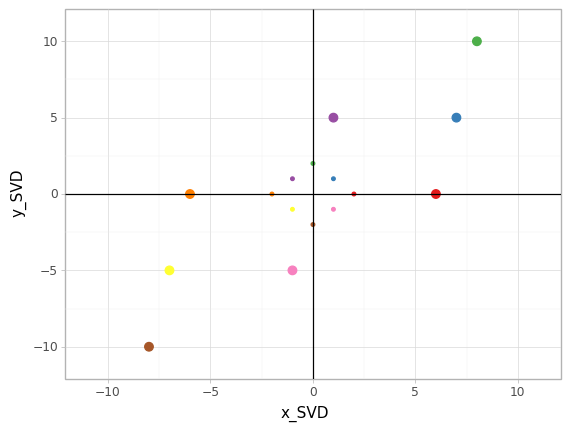

<ggplot: (8736407577561)>

In [ ]:
(ggplot(dane, aes('x_SVD','y_SVD', color = 'factor(c)')) +
 geom_point(size = 3, show_legend = False) +
 geom_point(aes('x','y', color = 'factor(c)'), size = 1, show_legend = False) +
 geom_hline(yintercept = 0) +
 geom_vline(xintercept = 0) +
 scale_color_brewer(type="qual", palette="Set1") +
 theme(figure_size=(5, 5)) +
 theme_light() +
 xlim(-11,11) +
 ylim(-11,11) 
)

#### Rotation according to the matrix $U$

In [ ]:
U

array([[-0.31622777, -0.9486833 ],
       [-0.9486833 ,  0.31622777]])

In [ ]:
dane[['x_U', 'y_U']] = np.matmul(dane.iloc[:,:2], U)

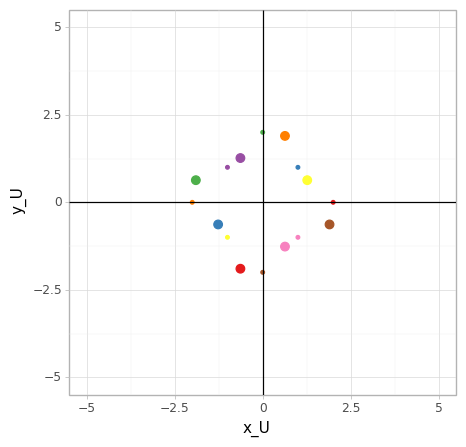

<ggplot: (8736412151665)>

In [ ]:
(ggplot(dane, aes('x_U','y_U', color = 'factor(c)')) +
 geom_point(size = 3, show_legend = False) +
 geom_point(aes('x','y', color = 'factor(c)'), size = 1, show_legend = False) +
 geom_hline(yintercept = 0) +
 geom_vline(xintercept = 0) +
 scale_color_brewer(type="qual", palette="Set1") +
 theme_light() +
 theme(figure_size=(5, 5)) +
 xlim(-5,5) +
 ylim(-5,5) 
)

#### Stretching according to the matrix $\sigma$

In [ ]:
S
# sigma

array([6.70820393, 2.23606798])

In [ ]:
dane[['x_S', 'y_S']] = np.matmul(dane.iloc[:,:2], sigma)

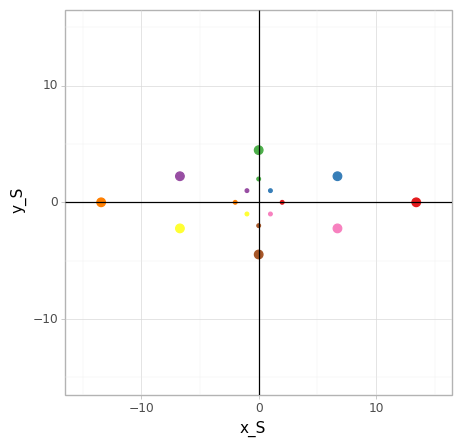

<ggplot: (8736407586197)>

In [ ]:
(ggplot(dane, aes('x_S','y_S', color = 'factor(c)')) +
 geom_point(size = 3, show_legend = False) +
 geom_point(aes('x','y', color = 'factor(c)'), size = 1, show_legend = False) +
 geom_hline(yintercept = 0) +
 geom_vline(xintercept = 0) +
 scale_color_brewer(type="qual", palette="Set1") +
 theme_light() +
 theme(figure_size=(5, 5)) +
 xlim(-15,15) +
 ylim(-15,15) 
)

#### Rotation according to the matrix $V$

In [ ]:
V

array([[-0.70710678, -0.70710678],
       [-0.70710678,  0.70710678]])

In [ ]:
dane[['x_V', 'y_V']] = np.matmul(dane.iloc[:,:2], V)

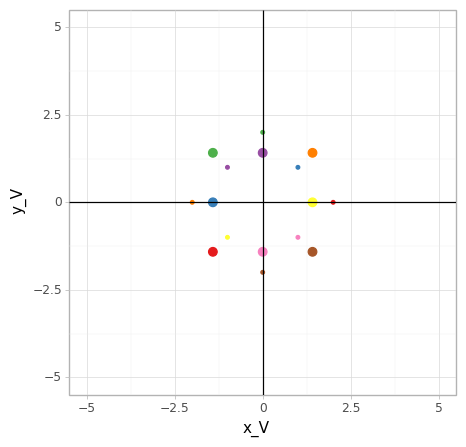

<ggplot: (8736407576069)>

In [ ]:
(ggplot(dane, aes('x_V','y_V', color = 'factor(c)')) +
 geom_point(size = 3, show_legend = False) +
 geom_point(aes('x','y', color = 'factor(c)'), size = 1, show_legend = False) +
 geom_hline(yintercept = 0) +
 geom_vline(xintercept = 0) +
 scale_color_brewer(type="qual", palette="Set1") +
 theme_light() +
 theme(figure_size=(5, 5)) +
 xlim(-5,5) +
 ylim(-5,5) 
)

In [ ]:
proc_waz = S/sum(S)
print(proc_waz)

[0.75 0.25]


#### Reproducing the transformation of $A$ using a single singular value

In [ ]:
k = 1
Uk=U[:,:k]
Vk=V[:k,:]
Sk=S[:k]
print(Sk)

[6.70820393]


In [ ]:
print(f'Macierz Uk ma wymiary {Uk.shape}')
print(f'Macierz Sk ma wymiary {Sk.shape}')
print(f'Macierz Vk ma wymiary {Vk.shape}')

Macierz Uk ma wymiary (2, 1)
Macierz Sk ma wymiary (1,)
Macierz Vk ma wymiary (1, 2)


In [ ]:
dane[['x_SVD1', 'y_SVD1']] = np.matmul(dane.iloc[:,:2],np.matmul(np.outer(Uk, Sk), Vk))

In [ ]:
dane[['x_SVD1', 'y_SVD1']]

,x_SVD1,y_SVD1
0,3.0,3.0
1,6.0,6.0
2,9.0,9.0
3,3.0,3.0
4,-3.0,-3.0
5,-6.0,-6.0
6,-9.0,-9.0
7,-3.0,-3.0


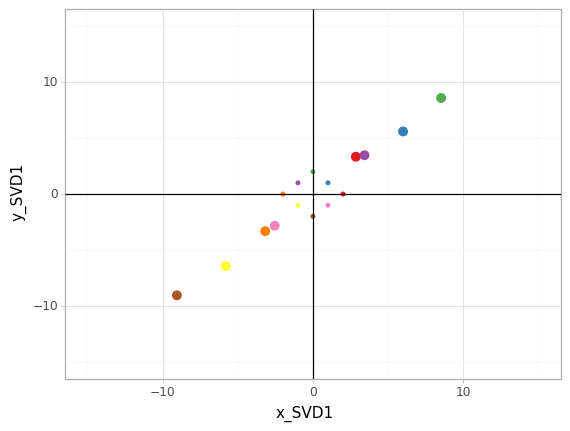

<ggplot: (8736406585201)>

In [ ]:
(ggplot(dane, aes('x_SVD1','y_SVD1', color = 'factor(c)')) +
 geom_jitter(size = 3, show_legend = False, width=0.5, height=0.5) +
 geom_point(aes('x','y', color = 'factor(c)'), size = 1, show_legend = False) +
 geom_hline(yintercept = 0) +
 geom_vline(xintercept = 0) +
 scale_color_brewer(type="qual", palette="Set1") +
 theme(figure_size=(5, 5)) +
 theme_light() +
 xlim(-15,15) +
 ylim(-15,15) 
)

#### Trivial example

In [ ]:
n = len(serce)
U, S, V = svd(serce)
sigma = np.diag(S)

In [ ]:
print(np.matmul(U, U.T).round(2))
print(np.matmul(V, V.T).round(2))

In [ ]:
print(f'Macierz U ma wymiary {U.shape}')
print(f'Macierz S ma wymiary {S.shape}')
print(f'Macierz sigma ma wymiary {sigma.shape}')
print(f'Macierz V ma wymiary {V.shape}')

sigma_to_V = np.c_[sigma, np.zeros((n, V.shape[0]-n))]
# print(f'Macierz sigma_to_V ma wymiary {sigma_to_V.shape}')

Macierz U ma wymiary (6, 6)
Macierz S ma wymiary (6,)
Macierz sigma ma wymiary (6, 6)
Macierz V ma wymiary (7, 7)


In [ ]:
#print(np.matmul(U, sigma).shape)
#print(np.matmul(np.matmul(U, sigma), V).shape)

print(np.matmul(np.matmul(U, sigma_to_V), V.T).shape)

(6, 7)


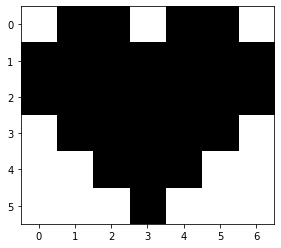

In [ ]:
obraz_all = np.matmul(np.matmul(U, sigma_to_V), V)
plt.imshow(1-obraz_all, cmap='gray')
plt.show()

#### Images of each singular value
Matrices respresenting images of each singular value.

In [ ]:
n = len(serce)
U, S, V = svd(serce)
# sigma_to_V = np.c_[sigma, np.zeros((n, V.shape[0]-n))]
# x=np.matmul(np.matmul(U, sigma_to_V), V)
# plt.imshow(x, cmap='gray')
# plt.show()

In [ ]:
# Miejsce na twój kod

imgs=[]
for k in range(1,len(S)+1):
  Uk=U[:,k-1:k]
  Sk=S[k-1:k]
  Vk=V[k-1:k,:]
  imgs.append(np.matmul(np.matmul(Uk, np.diag(Sk)), Vk))


#### Cumulative images of consecutive singular values

Matrices respresenting images of cumulative consecutive singular values.

In [ ]:

razem_imgs = [imgs[0]]
for i in range(0,n-1):
  razem_imgs.append(razem_imgs[i]+imgs[i+1])



#### Visualization of each singular value


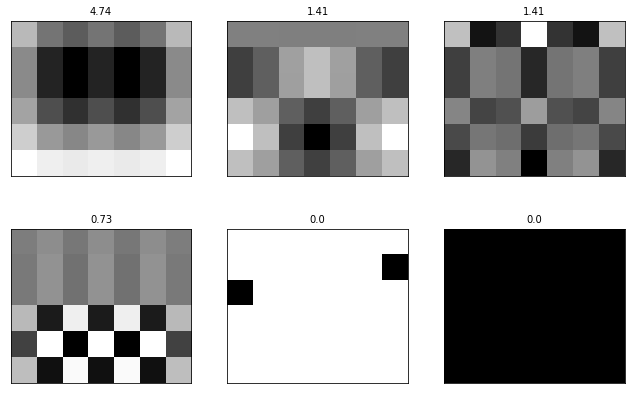

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(11, 7),
                         subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(1-imgs[i], cmap='gray')
    ax.set_title(np.round(S[i],2), fontsize=10)
plt.show()

#### Visualization of successive cumulative singular values


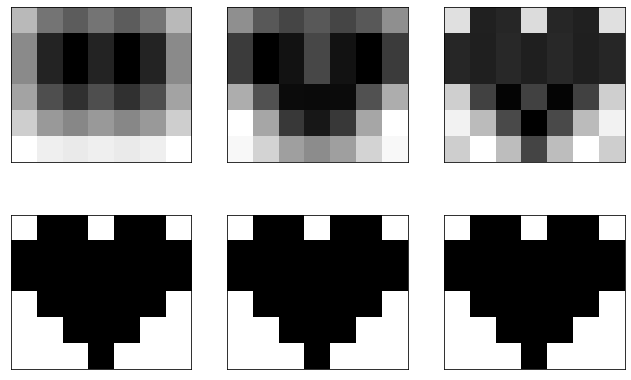

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(11, 7),
                         subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(1-razem_imgs[i], cmap='gray')
plt.show()

#### Real example

In [ ]:
n = len(most_sr)
U, S, V = svd(most_sr)

In [ ]:
print(f'Macierz U ma wymiary {U.shape}')
print(f'Macierz S ma wymiary {S.shape}')
print(f'Macierz V ma wymiary {V.shape}')

Macierz U ma wymiary (427, 427)
Macierz S ma wymiary (427,)
Macierz V ma wymiary (640, 640)


In [ ]:
k = 10
Uk=U[:,:k]
Sk=S[:k]
Vk=V[:k,:]

In [ ]:
print(f'Macierz Uk ma wymiary {Uk.shape}')
print(f'Macierz Sk ma wymiary {Sk.shape}')
print(f'Macierz Vk ma wymiary {Vk.shape}')

Macierz Uk ma wymiary (427, 1)
Macierz Sk ma wymiary (1,)
Macierz Vk ma wymiary (1, 640)


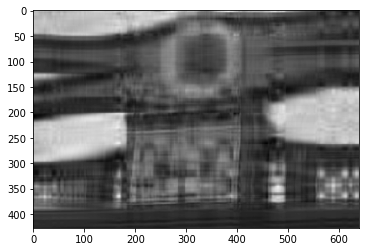

In [ ]:
obraz = np.matmul(np.matmul(Uk, np.diag(Sk)), Vk)
plt.imshow(obraz, cmap='gray')
plt.show()

In [ ]:
rozmiark = np.prod(Uk.shape)+np.prod(Sk.shape)+np.prod(Vk.shape)
print(f'Rozmiar danych to {rozmiark}, co stanowi {rozmiark/rozmiar:.2%}')

Rozmiar danych to 10680, co stanowi 3.91%


427

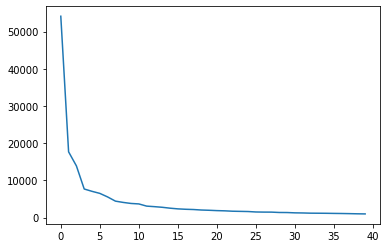

In [ ]:
plt.plot(S[:40]);
len(S)

68

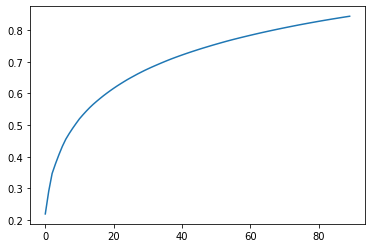

In [ ]:
proc_waz = S/sum(S)
proc_wazs=proc_waz.cumsum()
plt.plot(proc_wazs[:90])
number=len(proc_wazs[proc_wazs<0.8])+1
number

#### Images of each singular value

Matrix representing images of the first 60 singular values.

In [ ]:

img=[]
for k in range(0,60):
  Uk=U[:,k:k+1]
  Sk=S[k:k+1]
  Vk=V[k:k+1,:]
  img.append(np.matmul(np.matmul(Uk, np.diag(Sk)), Vk))

#### Cumulative images of consecutive singular values

Matrix representing images of cumulative consecutive first 60 singular values.

In [ ]:

razem_imgs = [img[0]]
for i in range(1,60):
  razem_imgs.append(razem_imgs[i-1]+img[i])


#### Visualization of each singular value


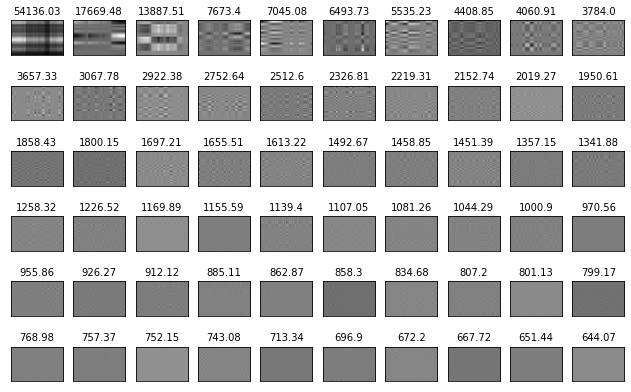

In [ ]:
fig, axes = plt.subplots(6, 10, figsize=(11, 7),
                         subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(img[i], cmap='gray')
    ax.set_title(np.round(S[i],2), fontsize=10)
plt.show()

#### Visualization of successive cumulative singular values


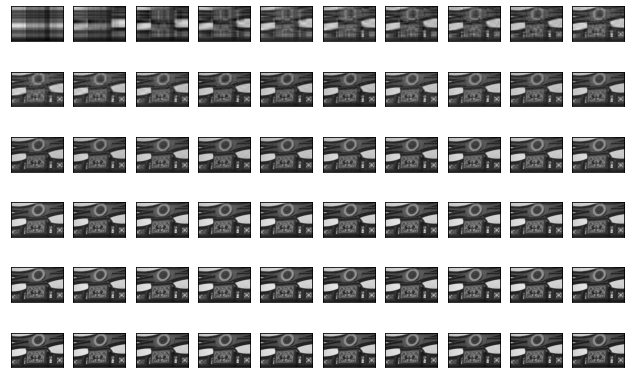

In [ ]:
fig, axes = plt.subplots(6, 10, figsize=(11, 7),
                         subplot_kw={'xticks':[], 'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(razem_imgs[i], cmap='gray')
plt.show()